<a href="https://colab.research.google.com/github/aanacaa/Bootcamp_Data_Science_Alura/blob/master/Desafio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

Fiz analise dos casos confirmados e mortes por 100k

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

##Importando bibliotecas e lendo dataset

In [27]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
from datetime import date, datetime
#from scipy.signal import find_peaks
#import matplotlib.ticker as ticker
#import matplotlib.dates as mdates

In [28]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [29]:
#Leitura do arquivo
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bootcamp-Data_Science_Alura/Fonte_dados/COVID19-BRASILIO-06-11-2020.csv/caso.csv", 
                    encoding="ISO-8859-1"
                  )

In [30]:
#Formatando as casas decimais
pd.options.display.float_format = "{:,.2f}".format

In [31]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,"881,935.00","894,470.00",12.00,"3,493.47",0.02
1,2020-11-04,AC,NaN,state,31218,696,233,False,"881,935.00","894,470.00",12.00,"3,490.11",0.02
2,2020-11-03,AC,NaN,state,30962,695,232,False,"881,935.00","894,470.00",12.00,"3,461.49",0.02
3,2020-11-02,AC,NaN,state,30954,693,231,False,"881,935.00","894,470.00",12.00,"3,460.60",0.02
4,2020-11-01,AC,NaN,state,30951,693,230,False,"881,935.00","894,470.00",12.00,"3,460.26",0.02


##Descrição das váriaveis e tipos

*  **date:** data de coleta dos dados no formato AAAA-MM-DD.
*  **state:** sigla da unidade federativa, exemplo: SP.
*  **city:** nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos* também).
*  **place_type:** tipo de local que esse registro descreve, pode ser city ou state.
*  **confirmed:** número de casos confirmados.
*  **deaths:** número de mortes.
*  **order_for_place:** número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
*  **is_last**: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
*  **estimated_pupulation_2019:** população estimada para esse município/estado em 2019, segundo o IBGE (É dito na documentação do dataset que essa coluna possui registros desatualizados).
*  **estimated_population:** população estimada para esse município/estado em 2020, segundo o IBGE.
*  **city_ibge_code:** código IBGE do local.
*  **confirmed_per_100k_inhabitants:** número de casos confirmados por 100.000 *  habitantes (baseado em estimated_population).
*  **death_rate:** taxa de mortalidade (mortes / confirmados).


Informação extraída em : https://github.com/turicas/covid19-br/blob/master/api.md#casos

In [32]:
#Formato dos campos
dados.dtypes

date                               object
state                              object
city                               object
place_type                         object
confirmed                           int64
deaths                              int64
order_for_place                     int64
is_last                              bool
estimated_population_2019         float64
estimated_population              float64
city_ibge_code                    float64
confirmed_per_100k_inhabitants    float64
death_rate                        float64
dtype: object

In [33]:
#Quantos isnull tem na planilha
dados.isna().sum()

date                                  0
state                                 0
city                               6335
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3655
estimated_population               3655
city_ibge_code                     3655
confirmed_per_100k_inhabitants    16982
death_rate                            0
dtype: int64

##Analise por Estado

In [34]:
#Como vou analisar estados então criei um novo dataset e removi algumas colunas
dados_por_estados = dados[dados['place_type'] == 'state']
dados_por_estados = dados_por_estados.sort_values(['state','date'], ascending=[True, False])
dados_por_estados.index = range(len(dados_por_estados))
dados_por_estados.head()
dados_por_estados = dados_por_estados.drop(['city', 'city_ibge_code'], axis=1)


In [35]:
print(dados_por_estados['state'].unique())

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [36]:
dados_por_estados.isna().sum()

date                              0
state                             0
place_type                        0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population_2019         0
estimated_population              0
confirmed_per_100k_inhabitants    6
death_rate                        0
dtype: int64

In [37]:
#Ainda tenho alguns dados null
dados_por_estados[dados_por_estados['confirmed_per_100k_inhabitants'].isnull()]

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate
3543,2020-03-17,PB,state,0,0,6,False,"4,018,127.00","4,039,277.00",nan,0.00
3544,2020-03-16,PB,state,0,0,5,False,"4,018,127.00","4,039,277.00",nan,0.00
3545,2020-03-15,PB,state,0,0,4,False,"4,018,127.00","4,039,277.00",nan,0.00
3546,2020-03-14,PB,state,0,0,3,False,"4,018,127.00","4,039,277.00",nan,0.00
3547,2020-03-13,PB,state,0,0,2,False,"4,018,127.00","4,039,277.00",nan,0.00
3548,2020-03-12,PB,state,0,0,1,False,"4,018,127.00","4,039,277.00",nan,0.00


In [38]:
# Substituindo o valor NaN por 0
dados_por_estados.replace(to_replace=np.nan, value=0, inplace=True)
dados_por_estados.isna().sum()

date                              0
state                             0
place_type                        0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population_2019         0
estimated_population              0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

In [40]:
dados_por_estados['date'] = pd.to_datetime(dados_por_estados['date'])
dados_por_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            6335 non-null   datetime64[ns]
 1   state                           6335 non-null   object        
 2   place_type                      6335 non-null   object        
 3   confirmed                       6335 non-null   int64         
 4   deaths                          6335 non-null   int64         
 5   order_for_place                 6335 non-null   int64         
 6   is_last                         6335 non-null   bool          
 7   estimated_population_2019       6335 non-null   float64       
 8   estimated_population            6335 non-null   float64       
 9   confirmed_per_100k_inhabitants  6335 non-null   float64       
 10  death_rate                      6335 non-null   float64       
dtypes: b

In [41]:
# Calculando o deaths_per_100k_inhabitants
deaths_per_inhabitants = dados_por_estados['deaths'] / dados_por_estados['estimated_population']
dados_por_estados['deaths_per_100k_inhabitants'] = deaths_per_inhabitants * 100000
dados_por_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants
0,2020-11-05,AC,state,31248,697,234,True,"881,935.00","894,470.00","3,493.47",0.02,77.92
1,2020-11-04,AC,state,31218,696,233,False,"881,935.00","894,470.00","3,490.11",0.02,77.81
2,2020-11-03,AC,state,30962,695,232,False,"881,935.00","894,470.00","3,461.49",0.02,77.70
3,2020-11-02,AC,state,30954,693,231,False,"881,935.00","894,470.00","3,460.60",0.02,77.48
4,2020-11-01,AC,state,30951,693,230,False,"881,935.00","894,470.00","3,460.26",0.02,77.48


##Casos Confirmados por 100k

In [42]:
#Ordenando o casos_por_100k_habitantes
casos_por_100k_habitantes = dados_por_estados.sort_values('confirmed_per_100k_inhabitants',
                                                                     ascending=False)
casos_por_100k_habitantes.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants
4926,2020-11-04,RR,state,58304,695,226,True,"605,761.00","631,181.00","9,237.29",0.01,110.11
4927,2020-11-03,RR,state,57789,693,225,False,"605,761.00","631,181.00","9,155.69",0.01,109.79
4928,2020-11-02,RR,state,57624,692,224,False,"605,761.00","631,181.00","9,129.55",0.01,109.64
4929,2020-11-01,RR,state,57488,692,223,False,"605,761.00","631,181.00","9,108.01",0.01,109.64
4930,2020-10-31,RR,state,57407,692,222,False,"605,761.00","631,181.00","9,095.17",0.01,109.64


In [43]:
#Data máxima
max_date = casos_por_100k_habitantes['date'].max().strftime('%d/%m/%y')
max_date

'05/11/20'

In [44]:
#Data mínima
min_date = casos_por_100k_habitantes['date'].min().strftime('%d/%m/%y')
min_date

'25/02/20'

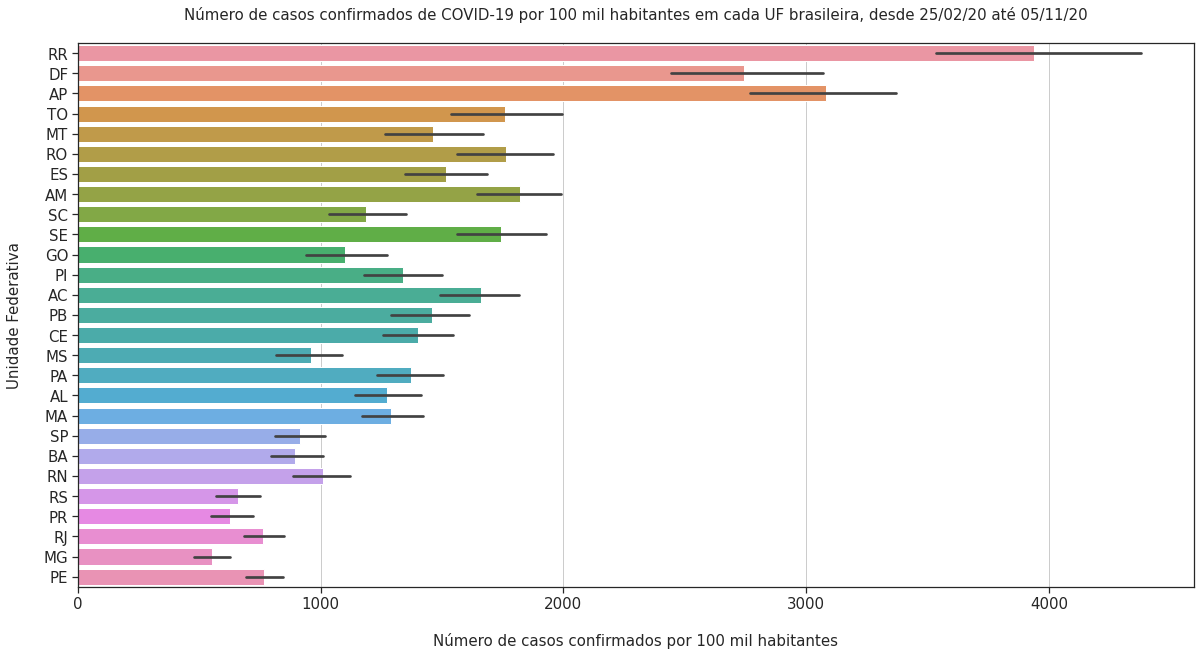

In [86]:
plt.figure(figsize=(20, 10))
sns.barplot(x='confirmed_per_100k_inhabitants', y='state', 
            data=casos_por_100k_habitantes)
sns.color_palette("pastel")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('\nNúmero de casos confirmados por 100 mil habitantes', fontsize=15)
plt.ylabel('Unidade Federativa\n', fontsize=15)
plt.title(f"Número de casos confirmados de COVID-19 por 100 mil habitantes em cada UF brasileira, desde {min_date} até {max_date}\n",
          fontsize=15)
plt.grid(axis='x')
plt.show()

In [21]:
# Definindo um estilo dos gráficos futuros
#sns.set_style('ticks')
#sns.set_context('notebook')

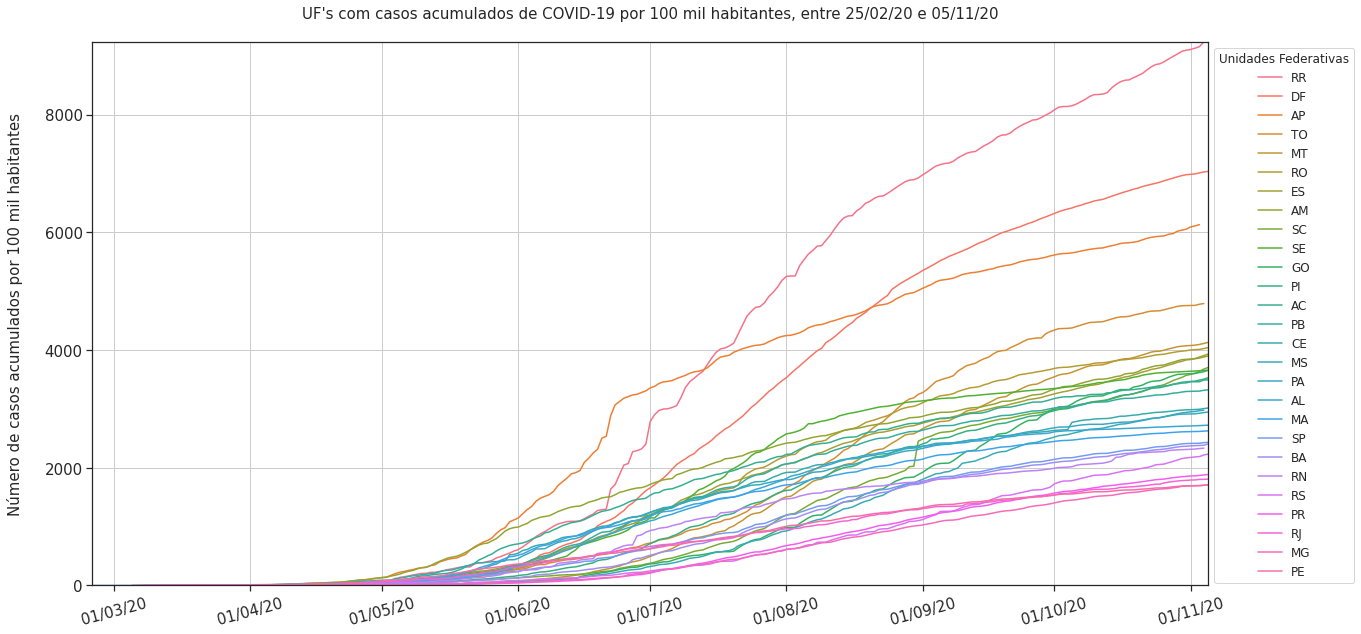

In [93]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='confirmed_per_100k_inhabitants',
                  data=casos_por_100k_habitantes, hue='state')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.legend(title='Unidades Federativas', fontsize=12, title_fontsize=12,
           bbox_to_anchor=(1, 1), loc='best')
plt.ylabel('Número de casos acumulados por 100 mil habitantes\n', fontsize=15)
plt.title(f"UF's com casos acumulados de COVID-19 por 100 mil habitantes, entre {min_date} e {max_date}\n", fontsize=15)
plt.grid()
plt.show()

In [97]:
top_estados_casos_e_SP = ['DF', 'RR', 'AP', 'SP']
class_top_estados_casos = dados_por_estados[dados_por_estados['state'].isin(top_estados_casos_e_SP)]
max_date = class_top_estados_casos['date'].max().strftime('%d/%m/%y')
min_date = class_top_estados_casos['date'].min().strftime('%d/%m/%y')
class_top_estados_casos.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants
708,2020-11-03,AP,state,52832,751,228,True,"845,731.00","861,773.00","6,130.62",0.01,87.15
709,2020-11-02,AP,state,52653,749,227,False,"845,731.00","861,773.00","6,109.85",0.01,86.91
710,2020-11-01,AP,state,52500,748,226,False,"845,731.00","861,773.00","6,092.09",0.01,86.80
711,2020-10-31,AP,state,52175,748,225,False,"845,731.00","861,773.00","6,054.38",0.01,86.80
712,2020-10-30,AP,state,52030,747,224,False,"845,731.00","861,773.00","6,037.55",0.01,86.68


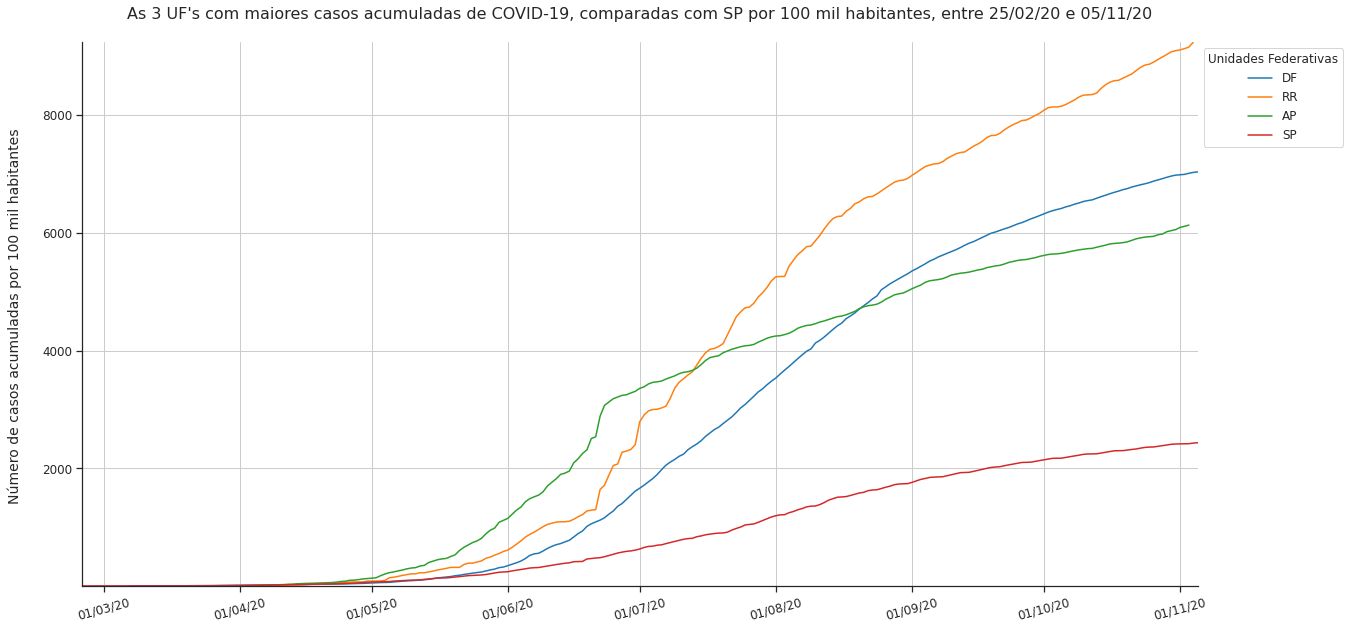

In [102]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y='confirmed_per_100k_inhabitants',
                  data=class_top_estados_casos, hue='state', hue_order=top_estados_casos_e_SP)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.legend(title='Unidades Federativas', fontsize=12, title_fontsize=12,
           bbox_to_anchor=(1, 1), loc='best')
plt.ylabel('Número de casos acumuladas por 100 mil habitantes \n', fontsize=14)
plt.title(f"As 3 UF's com maiores casos acumuladas de COVID-19, comparadas com SP por 100 mil habitantes, entre {min_date} e {max_date}\n", fontsize=16)
plt.grid()
sns.despine()
plt.show()

##Mortes por 100k

In [99]:
mortes_por_100k_habitantes = dados_por_estados.sort_values('deaths_per_100k_inhabitants',
                                                                  ascending=False)
mortes_por_100k_habitantes.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants
1414,2020-11-05,DF,state,214955,3728,243,True,"3,015,268.00","3,055,149.00","7,035.83",0.02,122.02
1415,2020-11-04,DF,state,214655,3719,242,False,"3,015,268.00","3,055,149.00","7,026.01",0.02,121.73
1416,2020-11-03,DF,state,214202,3707,241,False,"3,015,268.00","3,055,149.00","7,011.18",0.02,121.34
1417,2020-11-02,DF,state,213636,3695,240,False,"3,015,268.00","3,055,149.00","6,992.65",0.02,120.94
1418,2020-11-01,DF,state,213456,3688,239,False,"3,015,268.00","3,055,149.00","6,986.76",0.02,120.71


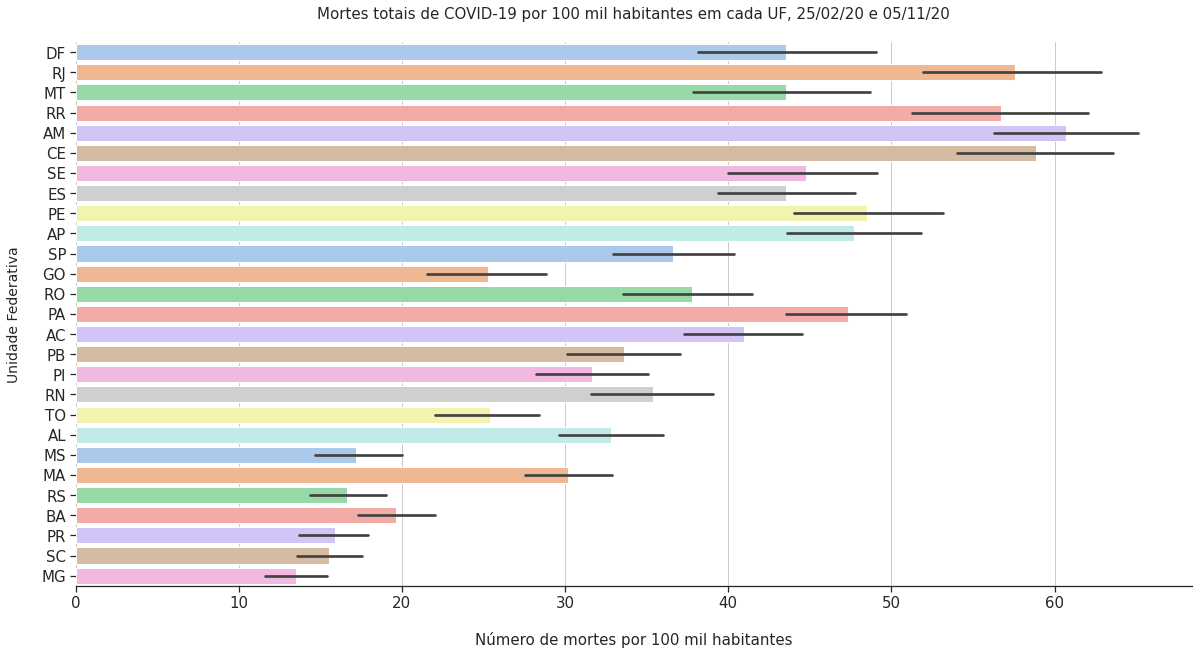

In [110]:
plt.figure(figsize=(20, 10))
sns.barplot(x='deaths_per_100k_inhabitants', y='state', palette='pastel',
            data=mortes_por_100k_habitantes)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('\nNúmero de mortes por 100 mil habitantes', fontsize=15)
plt.ylabel('Unidade Federativa\n', fontsize=14)
plt.title(f'Mortes totais de COVID-19 por 100 mil habitantes em cada UF, {min_date} e {max_date}\n',
          fontsize=15)
plt.grid(axis='x')
sns.despine(left=True)
plt.show()

In [78]:
casos_mortes_por_100k_habitantes = dados_por_estados.sort_values('deaths_per_100k_inhabitants',
                                                                     ascending=False)
casos_mortes_por_100k_habitantes.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants
1414,2020-11-05,DF,state,214955,3728,243,True,"3,015,268.00","3,055,149.00","7,035.83",0.02,122.02
1415,2020-11-04,DF,state,214655,3719,242,False,"3,015,268.00","3,055,149.00","7,026.01",0.02,121.73
1416,2020-11-03,DF,state,214202,3707,241,False,"3,015,268.00","3,055,149.00","7,011.18",0.02,121.34
1417,2020-11-02,DF,state,213636,3695,240,False,"3,015,268.00","3,055,149.00","6,992.65",0.02,120.94
1418,2020-11-01,DF,state,213456,3688,239,False,"3,015,268.00","3,055,149.00","6,986.76",0.02,120.71


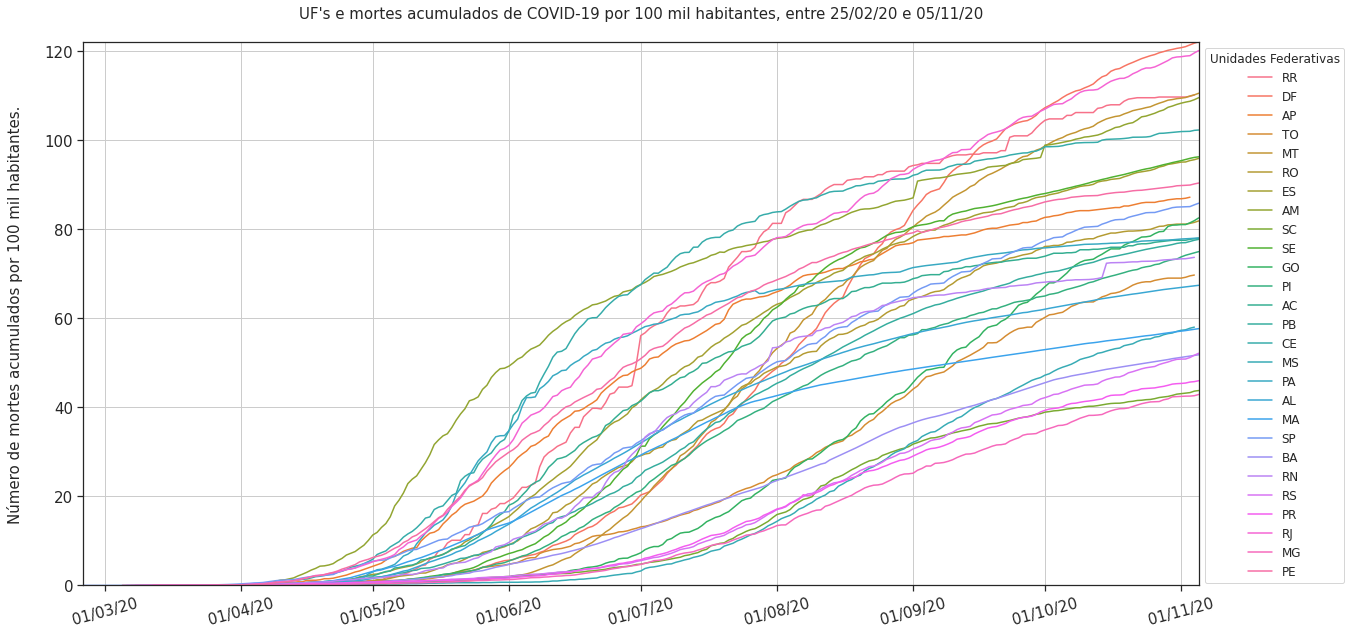

In [108]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='deaths_per_100k_inhabitants',
                  data=casos_por_100k_habitantes, hue='state')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.legend(title='Unidades Federativas', fontsize=12, title_fontsize=12,
           bbox_to_anchor=(1, 1), loc='best')
plt.ylabel('Número de mortes acumulados por 100 mil habitantes.\n', fontsize=15)
plt.title(f"UF's e mortes acumulados de COVID-19 por 100 mil habitantes, entre {min_date} e {max_date}\n", fontsize=15)
plt.grid()
plt.show()

In [109]:
top_estados_mortes_e_SP = ['DF', 'MT', 'RJ', 'SP']
class_top_estados_mortes = dados_por_estados[dados_por_estados['state'].isin(top_estados_mortes_e_SP)]
max_date = class_top_estados_mortes['date'].max().strftime('%d/%m/%y')
min_date = class_top_estados_mortes['date'].min().strftime('%d/%m/%y')
class_top_estados_mortes.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants
1414,2020-11-05,DF,state,214955,3728,243,True,"3,015,268.00","3,055,149.00","7,035.83",0.02,122.02
1415,2020-11-04,DF,state,214655,3719,242,False,"3,015,268.00","3,055,149.00","7,026.01",0.02,121.73
1416,2020-11-03,DF,state,214202,3707,241,False,"3,015,268.00","3,055,149.00","7,011.18",0.02,121.34
1417,2020-11-02,DF,state,213636,3695,240,False,"3,015,268.00","3,055,149.00","6,992.65",0.02,120.94
1418,2020-11-01,DF,state,213456,3688,239,False,"3,015,268.00","3,055,149.00","6,986.76",0.02,120.71


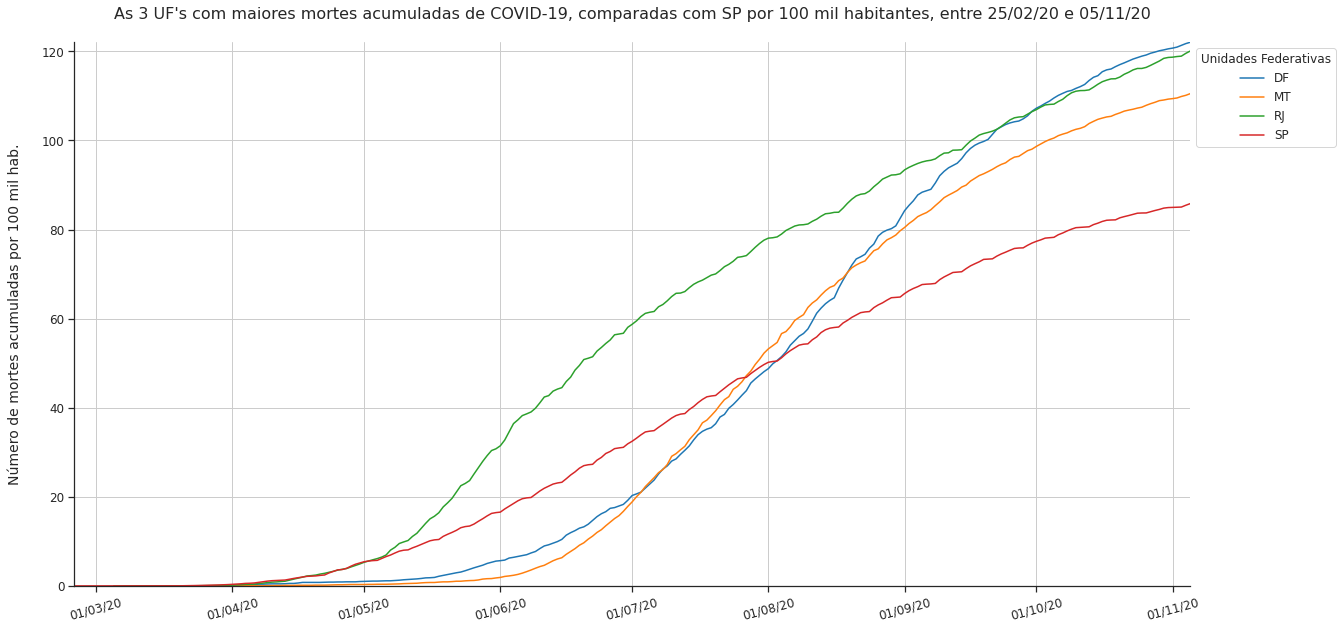

In [107]:
# Exibindo o gráfico das mortes acumuladas / 100k
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y='deaths_per_100k_inhabitants',
                  data=class_top_estados_mortes, hue='state', hue_order=top_estados_mortes_e_SP)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.legend(title='Unidades Federativas', fontsize=12, title_fontsize=12,
           bbox_to_anchor=(1, 1), loc='best')
plt.ylabel('Número de mortes acumuladas por 100 mil habitantes\n', fontsize=14)
plt.title(f"As 3 UF's com maiores mortes acumuladas de COVID-19, comparadas com SP por 100 mil habitantes, entre {min_date} e {max_date}\n", fontsize=16)
plt.grid()
sns.despine()
plt.show()